## Step 1: Import Necessary Libraries

In [ ]:
import os
import re
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

## specify the directory you saved the data and images in
DATA_DIR = os.path.join("..","data")
IMAGE_DIR = os.path.join("..","images")

## Step 2: Load the Dataset

In [ ]:
data = pd.read_csv(os.path.join(DATA_DIR, "aavail-data-visualization.csv"))

data

## Step 3: Explore the Dataset

In [ ]:
# View the first few rows of the dataset
print(data.head())

# Check for basic information
print(data.info())

# Check for missing values
missing_data = data.isnull().sum()
print("Missing Data Summary:\n", missing_data)

# Check basic statistics
print(data.describe())

## Step 4: Investigate Missing Data

In [ ]:
sns.set_style('dark')
sns.set(font_scale=1.2)

fig = plt.figure(figsize=(20,40))
plt.suptitle('Before Transformation', x=0.5, y=1.0, ha='center', fontsize='large')

plt.subplot(7,2,1)
plt.title("Customer ID")
sns.distplot(data.customer_id)

plt.subplot(7,2,2)
plt.title("Country Name")
sns.countplot(data.country_name)

plt.subplot(7,2,3)
plt.title("Age")
sns.distplot(data.age)

plt.subplot(7,2,4)
plt.title("Is Subscriber?")
sns.countplot(data.is_subscriber)

plt.subplot(7,2,5)
plt.title("Subscriber Type")
sns.countplot(data.subscriber_type)

plt.subplot(7,2,6)
plt.title("Number of streams")
sns.countplot(data.num_streams)

plt.tight_layout()
plt.show()

In [ ]:
data.boxplot(figsize=(20,20))

plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')

plt.tight_layout()

plt.show()

In [ ]:
# Visualizing missing data
plt.figure(figsize=(15, 8))
plt.suptitle("Missing Data Analysis", fontsize=16)

# Heatmap of missing values
plt.subplot(1, 2, 1)
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Data")

# Barplot for missing percentages
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

plt.subplot(1, 2, 2)
missing_percentage.plot(kind='bar', color='steelblue')
plt.title("Missing Data Percentage by Column")
plt.ylabel("Percentage")
plt.xlabel("Features")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
sns.pairplot(data.sample(500))
plt.show()

## Step 5: Handle Missing Data

In [ ]:
# Numeric columns imputation with median
numeric_cols = ['num_streams']
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Categorical columns imputation with mode
categorical_cols = ['subscriber_type']
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

## Step 6: Churn Definition

In [ ]:
# Define churn based on subscription status
data['Churn'] = data['is_subscriber'].apply(lambda x: 0 if x else 1)

In [ ]:
data

## Step 7: Churn Analysis and Visualization

In [ ]:
# Grouping churn data by country
churn_by_country = data.groupby(['country_name', 'Churn']).size().unstack()

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle("US and Singapore Churn Analysis", fontsize=16)

# Stacked Bar Plot
churn_by_country.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title("Churn Distribution by Country")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Customer Count")
axes[0].legend(title="Churn", labels=["Not Churned", "Churned"])

# Churn Rate Comparison
churn_rate = data.groupby('country_name')['Churn'].mean()
churn_rate.plot(kind='bar', color=['blue', 'orange'], ax=axes[1])
axes[1].set_title("Churn Rate by Country")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Churn Rate")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# Check for missing values
missing_data1 = data.isnull().sum()
print("Missing Data Summary:\n", missing_data1)

In [ ]:
# Check for remaining missing values
print(data.isnull().sum())

# Verify imputation was applied correctly
print(data['subscriber_type'].value_counts())
print(data['num_streams'].describe())

# Plot distributions to detect anomalies
sns.displot(data['num_streams'], kde=True, bins=30)
plt.title("Number of Streams Distribution")
plt.show()

sns.countplot(data['subscriber_type'])
plt.title("Subscriber Type Distribution")
plt.show()

In [11]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
sns.set(font_scale=1.2)
pd.set_option('display.max_columns', None)
np.random.seed(0)

In [2]:
# Step 2: Load the Dataset
df = pd.read_csv("../data/aavail-data-visualization.csv")
df

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
0,1,united_states,21.0,Kasen Todd,True,aavail_premium,23.0
1,2,singapore,31.0,Ensley Garza,False,NaN,12.0
2,3,united_states,22.0,Lillian Carey,False,aavail_premium,22.0
3,4,united_states,21.0,Beau Christensen,True,aavail_basic,19.0
4,5,singapore,22.0,Ernesto Gibson,True,aavail_premium,23.0
...,...,...,...,...,...,...,...
995,996,singapore,55.0,Peyton Enriquez,False,aavail_unlimited,14.0
996,997,united_states,23.0,Amina Manning,True,aavail_basic,24.0
997,998,united_states,25.0,Brooks Ventura,True,aavail_unlimited,17.0
998,999,united_states,40.0,Nayeli Mathis,True,aavail_unlimited,16.0


In [5]:
# Step 3: Exploratory Data Analysis
print(df.info())
print(df.describe())
print("Missing Data Summary:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1000 non-null   int64  
 1   country_name     1000 non-null   object 
 2   age              1000 non-null   float64
 3   customer_name    1000 non-null   object 
 4   is_subscriber    1000 non-null   bool   
 5   subscriber_type  928 non-null    object 
 6   num_streams      954 non-null    float64
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 48.0+ KB
None
       customer_id          age  num_streams
count  1000.000000  1000.000000   954.000000
mean    500.500000    27.532000    17.780922
std     288.819436     9.120096     4.752115
min       1.000000    14.000000     1.000000
25%     250.750000    21.000000    15.000000
50%     500.500000    24.000000    19.000000
75%     750.250000    33.000000    21.000000
max    1000.000000    57.000000    29.000000

/var/folders/_x/c69d2mwn5vg_tm50kkcngf3c0000gn/T/ipykernel_88269/3819652370.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='country_name', palette='husl')
/var/folders/_x/c69d2mwn5vg_tm50kkcngf3c0000gn/T/ipykernel_88269/3819652370.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_subscriber', palette='pastel')
/var/folders/_x/c69d2mwn5vg_tm50kkcngf3c0000gn/T/ipykernel_88269/3819652370.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='subscriber_type', palette='muted', order=df['subscrib

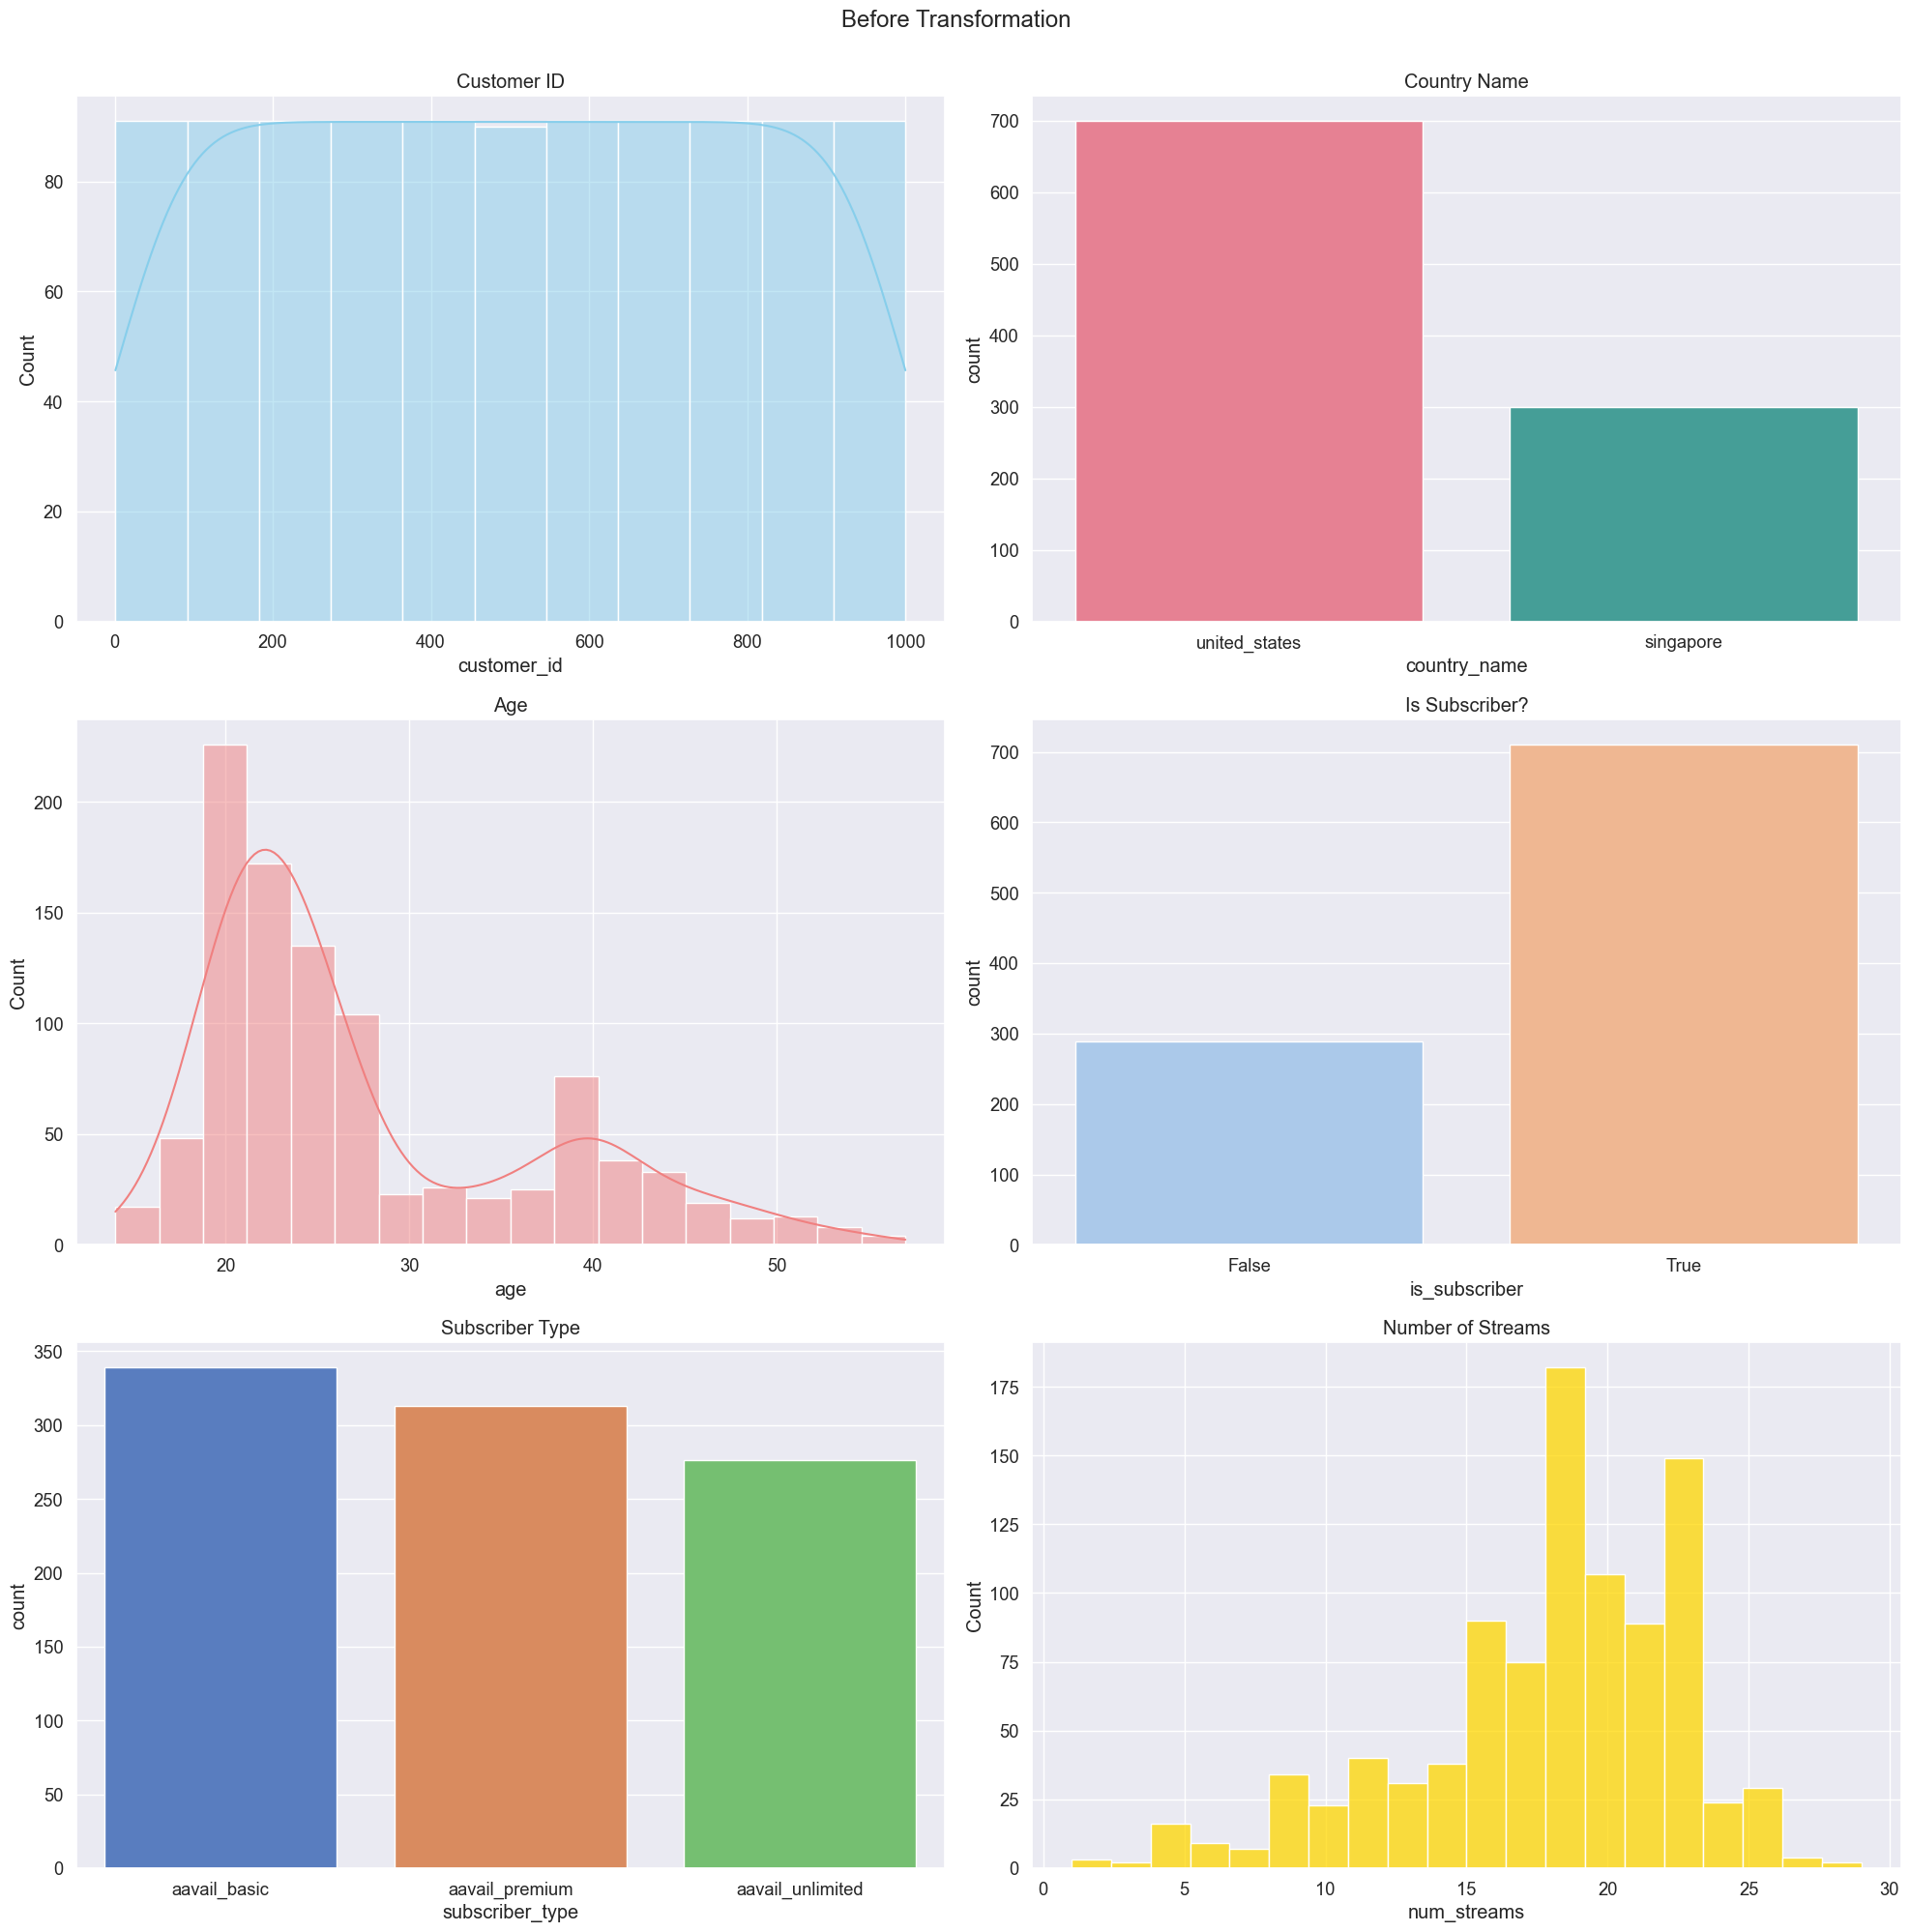

In [7]:
fig = plt.figure(figsize=(20, 20))
plt.suptitle('Before Transformation', x=0.5, y=1.0, ha='center', fontsize='large')

plt.subplot(3, 2, 1)
plt.title("Customer ID")
sns.histplot(df.customer_id, kde=True, color='skyblue')

plt.subplot(3, 2, 2)
plt.title("Country Name")
sns.countplot(data=df, x='country_name', palette='husl')

plt.subplot(3, 2, 3)
plt.title("Age")
sns.histplot(df.age, kde=True, color='lightcoral')

plt.subplot(3, 2, 4)
plt.title("Is Subscriber?")
sns.countplot(data=df, x='is_subscriber', palette='pastel')

plt.subplot(3, 2, 5)
plt.title("Subscriber Type")
sns.countplot(data=df, x='subscriber_type', palette='muted', order=df['subscriber_type'].value_counts().index)

plt.subplot(3, 2, 6)
plt.title("Number of Streams")
sns.histplot(df.num_streams, kde=False, color='gold', bins=20)

plt.tight_layout()
plt.show()

In [9]:
# Step 5: Handle Missing Data
# Impute numeric columns with the median
median_imputer = MeanMedianImputer(imputation_method='median', variables=['num_streams'])
median_imputer.fit(df)
df = median_imputer.transform(df)

# Impute categorical columns with the most frequent value
categorical_imputer = CategoricalImputer(variables=['subscriber_type'], fill_value='Missing')
categorical_imputer.fit(df)
df = categorical_imputer.transform(df)

# Verify Missing Data is Resolved
print("Missing Data After Imputation:\n", df.isnull().sum())

Missing Data After Imputation:
 customer_id        0
country_name       0
age                0
customer_name      0
is_subscriber      0
subscriber_type    0
num_streams        0
dtype: int64


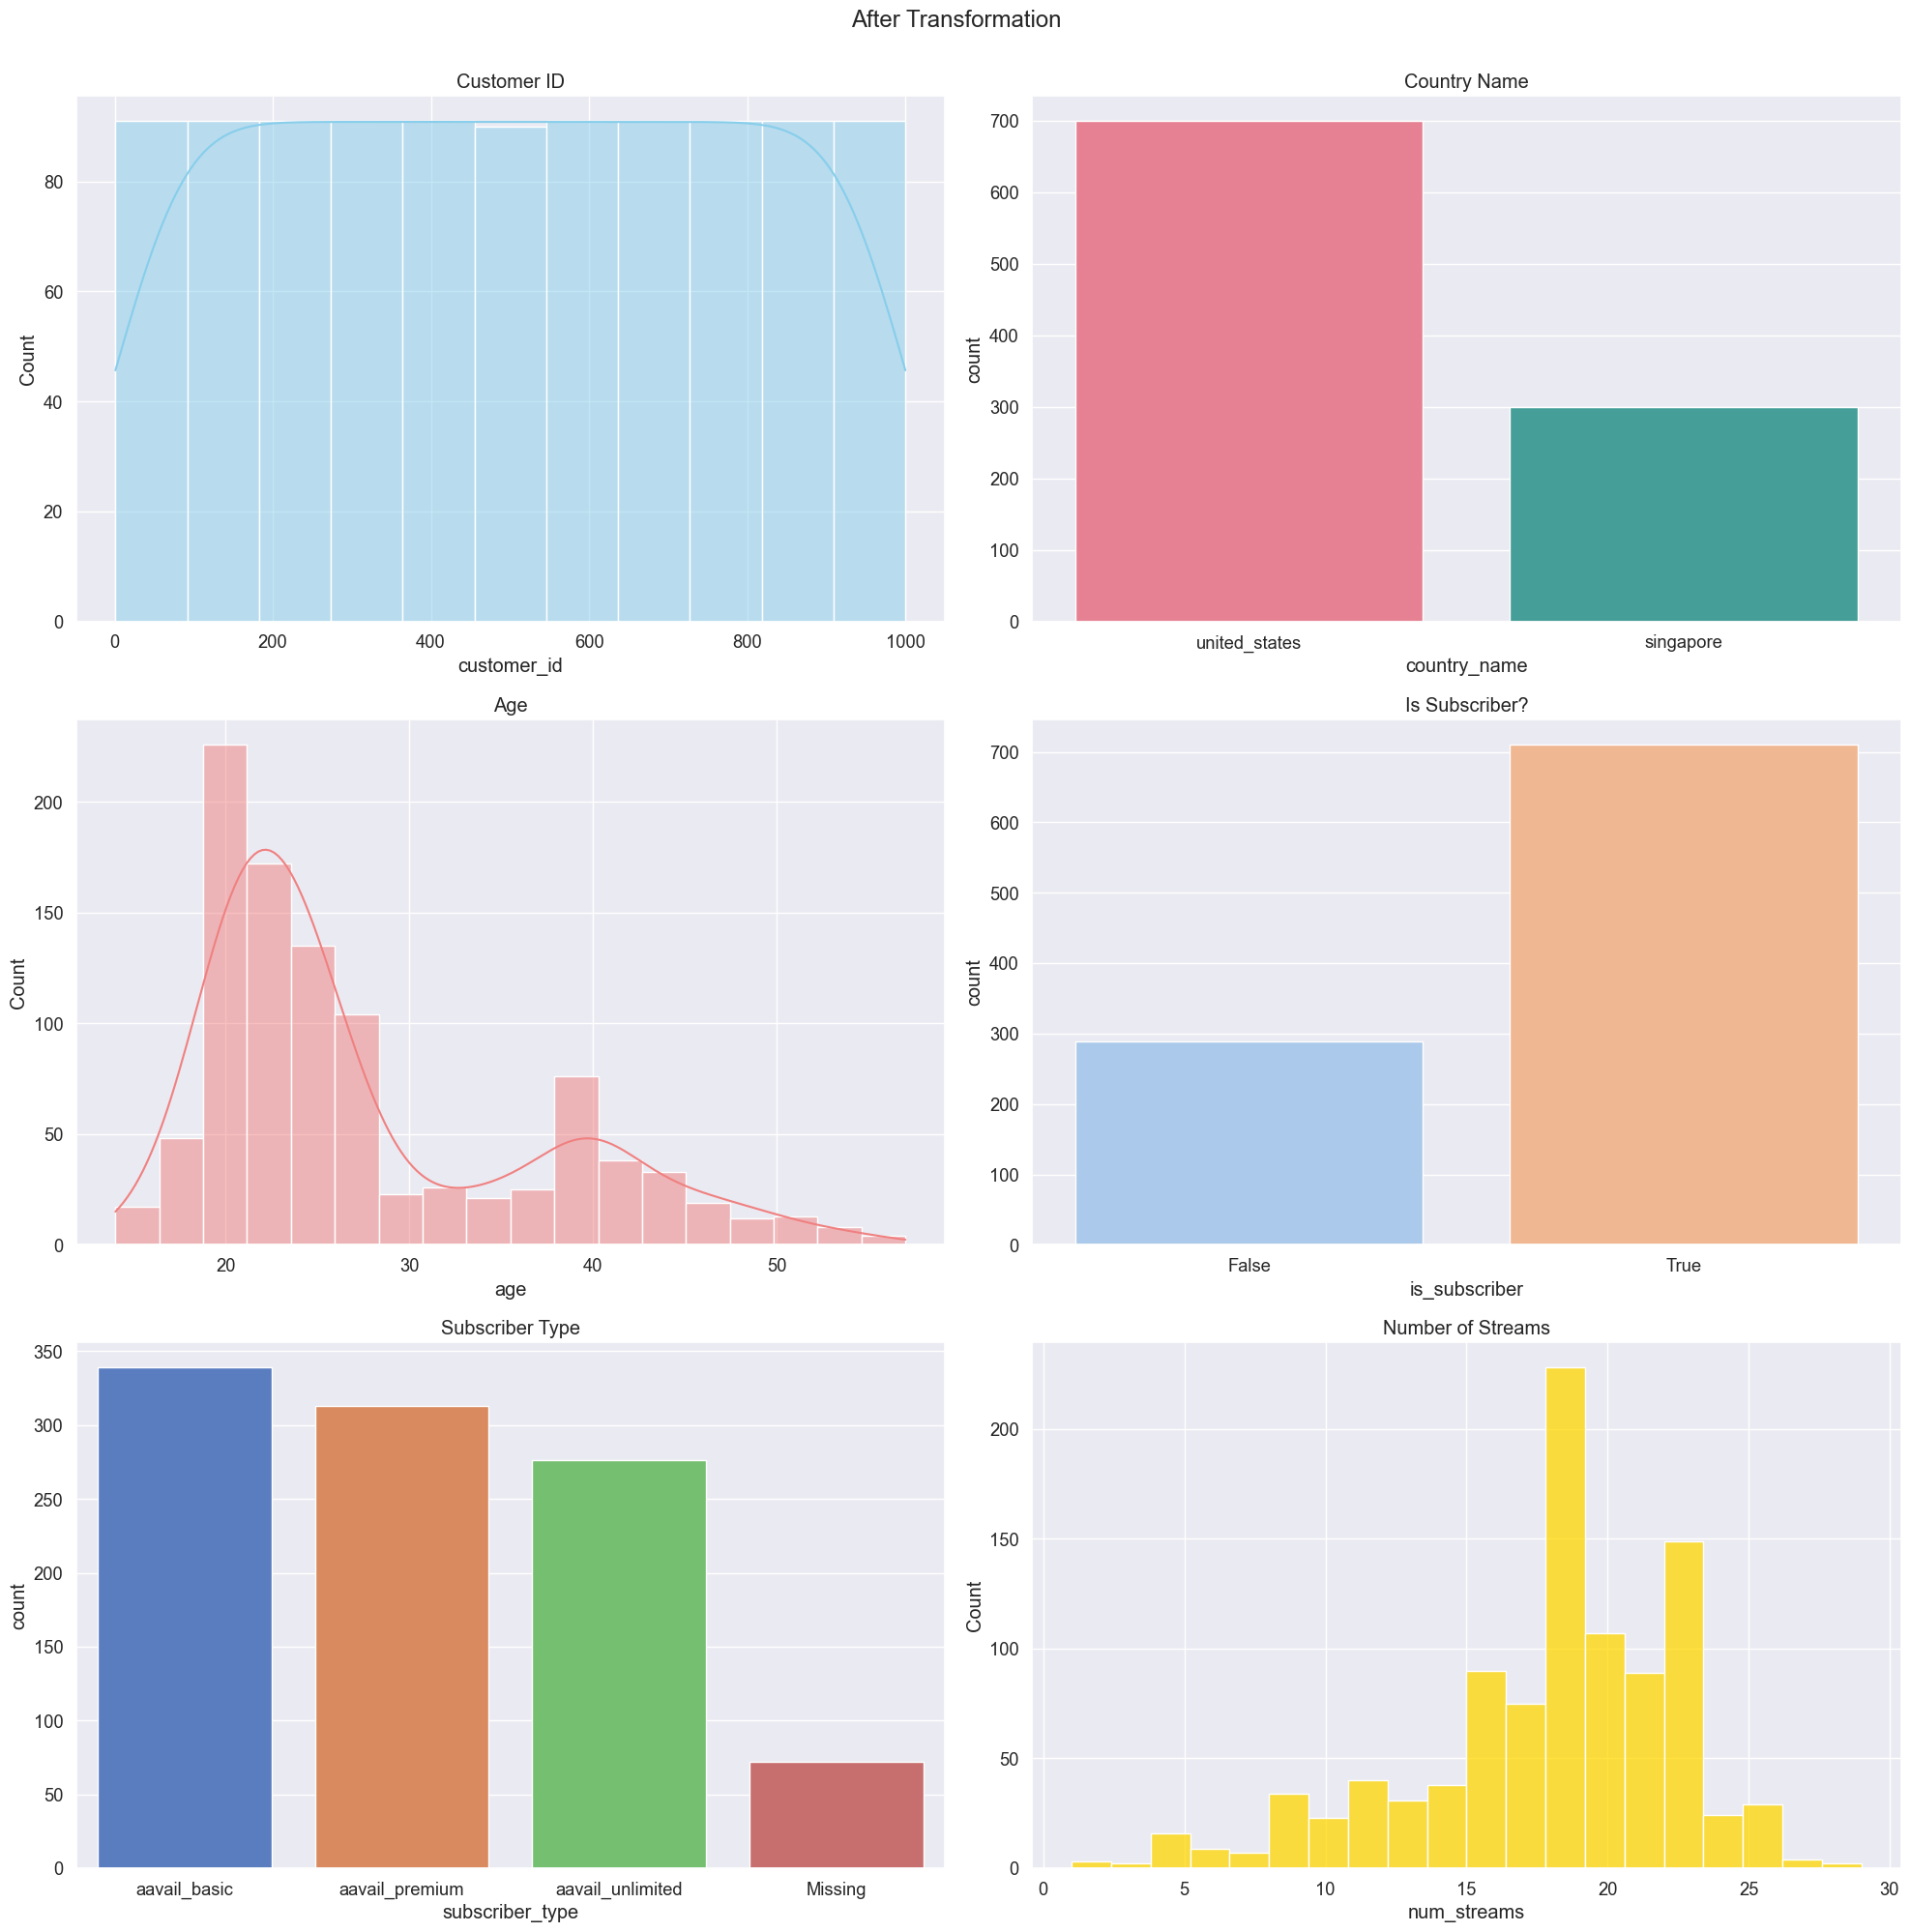

In [13]:
# Step 6: Visualize the Data After Transformation
fig = plt.figure(figsize=(20, 20))
plt.suptitle('After Transformation', x=0.5, y=1.0, ha='center', fontsize='large')

plt.subplot(3, 2, 1)
plt.title("Customer ID")
sns.histplot(df.customer_id, kde=True, color='skyblue')

plt.subplot(3, 2, 2)
plt.title("Country Name")
sns.countplot(data=df, x='country_name', palette='husl')

plt.subplot(3, 2, 3)
plt.title("Age")
sns.histplot(df.age, kde=True, color='lightcoral')

plt.subplot(3, 2, 4)
plt.title("Is Subscriber?")
sns.countplot(data=df, x='is_subscriber', palette='pastel')

plt.subplot(3, 2, 5)
plt.title("Subscriber Type")
sns.countplot(data=df, x='subscriber_type', palette='muted', order=df['subscriber_type'].value_counts().index)

plt.subplot(3, 2, 6)
plt.title("Number of Streams")
sns.histplot(df.num_streams, kde=False, color='gold', bins=20)

plt.tight_layout()
plt.show()

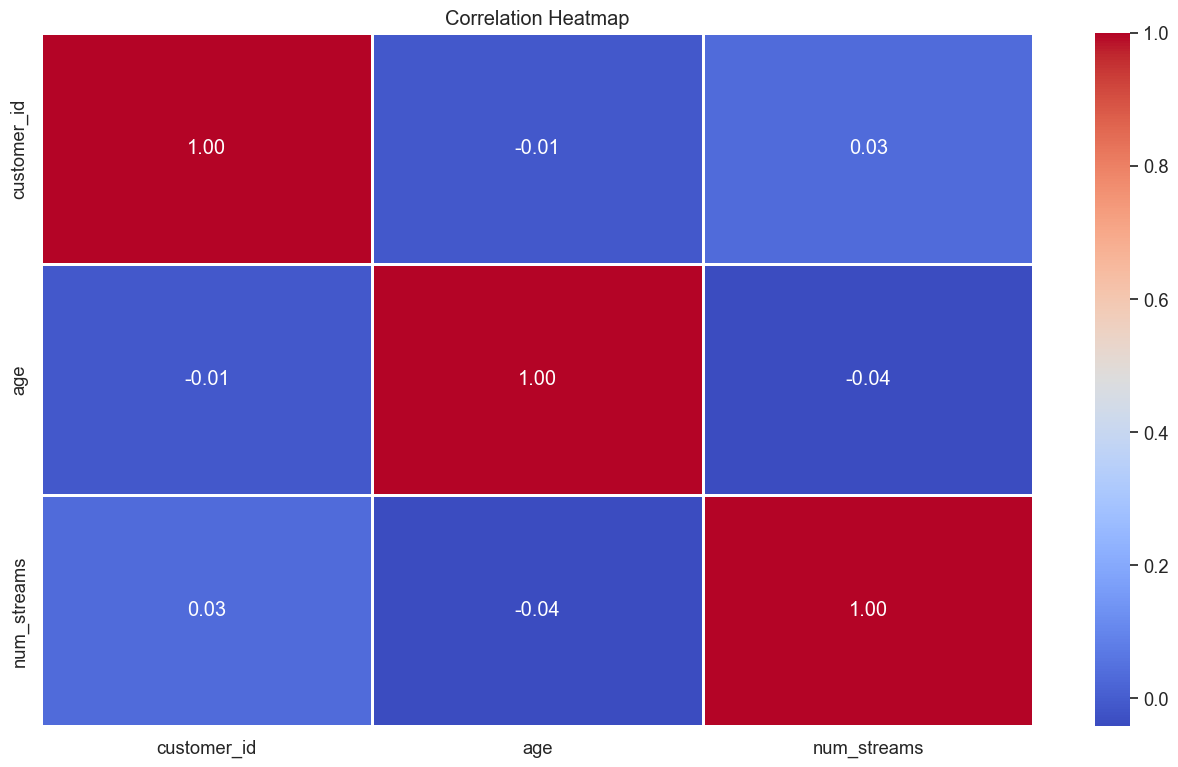

In [16]:
# Step 7: Correlation Heatmap
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Step 7: Correlation Heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, fmt='.2f', linewidths=2)
plt.title("Correlation Heatmap")
plt.show()